# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Reynaldi Putra Hertiansa
- Email: reyhertiansa@gmail.com
- Id Dicoding: rphertiansa

## Menentukan Pertanyaan Bisnis
1. Kota mana yang paling banyak terdapat customer dan seller?
2. Berapa banyak jumlah customer dan seller di kota tersebut?
3. Berapa volume transaksi customer dan seller di kota tersebut?
4. Berapa nominal transaksi customer dan seller di kota tersebut?
5. Bagaimana distribusi customer dan seller di kota tersebut dalam bentuk peta kontur?
6. Bagaimana distribusi nominal transaksi di kota tersebut dalam bentuk peta kontur?

## Menyiapkan semua library yang dibutuhkan

In [1258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import folium
from folium.plugins import HeatMap

## Data Wrangling

### Gathering Data
Mendeklarasikan dataset yang dibutuhkan

In [1259]:
customers_data = pd.read_csv('data/customers_dataset.csv')
sellers_data = pd.read_csv('data/sellers_dataset.csv')
orders_data = pd.read_csv('data/orders_dataset.csv')
order_items_data = pd.read_csv('data/order_items_dataset.csv')
order_payments_data = pd.read_csv('data/order_payments_dataset.csv')
geolocation_data = pd.read_csv('data/geolocation_dataset.csv')


### Assessing Data
Menampilkan info dari tiap dataset dan mengecek apakah ada data null: \n atau duplikat

In [1260]:
print(customers_data.head())
print(customers_data.info())
print(customers_data.describe())
print('Jumlah data null: \n', customers_data.isnull().sum())
print('Jumlah data duplikat: ', customers_data.duplicated().sum())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count

In [1261]:
print(sellers_data.head())
print(sellers_data.info())
print(sellers_data.describe())
print('Jumlah data null: \n', sellers_data.isnull().sum())
print('Jumlah data duplikat: ', sellers_data.duplicated().sum())

                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-n

In [1262]:
print(orders_data.head())
print(orders_data.info())
print(orders_data.describe())
print('Jumlah data null: \n', orders_data.isnull().sum())
print('Jumlah data duplikat: ', orders_data.duplicated().sum())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [1263]:
print(order_items_data.head())
print(order_items_data.info())
print(order_items_data.describe())
print('Jumlah data null: \n', order_items_data.isnull().sum())
print('Jumlah data duplikat: ', order_items_data.duplicated().sum())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

In [1264]:
print(order_payments_data.head())
print(order_payments_data.info())
print(order_payments_data.describe())
print('Jumlah data null: \n', order_payments_data.isnull().sum())
print('Jumlah data duplikat: ', order_payments_data.duplicated().sum())

                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2 

In [1265]:
print(geolocation_data.head())
print(geolocation_data.info())
print(geolocation_data.describe())
print('Jumlah data null: \n', geolocation_data.isnull().sum())
print('Jumlah data duplikat: ', geolocation_data.duplicated().sum())

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   

### Cleaning Data
Terdapat beberapa data null dan duplikat pada orders_data dan geolocation_data, namun data tersebut tidak relevan dan tidak diperlukan untuk ke tahap analisis selanjutnya.

#### Rename
Kolom zipcode akan menjadi kolom yang penting dalam tahap analisis selanjutnya. Kolom ini terdapat di customers_data, sellers_data, dan geolocation_data, namun masing-masing memiliki nama berbeda. Akan dilakukan pengubahan nama kolom agar mempermudah analisis.

In [1266]:
customers_data = customers_data.rename(columns={'customer_zip_code_prefix':'zipcode'})
print(customers_data.head(5))

sellers_data = sellers_data.rename(columns={'seller_zip_code_prefix':'zipcode'})
print(sellers_data.head(5))

geolocation_data = geolocation_data.rename(columns={'geolocation_zip_code_prefix':'zipcode', 'geolocation_lat': 'lat', 'geolocation_lng': 'long'})
print(geolocation_data.head(5))

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   zipcode          customer_city customer_state  
0    14409                 franca             SP  
1     9790  sao bernardo do campo             SP  
2     1151              sao paulo             SP  
3     8775        mogi das cruzes             SP  
4    13056               campinas             SP  
                          seller_id  zipcode        seller_city seller_state
0  3442f8959a84dea7ee197c632cb2df15    13023           campinas           SP
1  d1b65fc7debc3361ea86b5f14c68d2e2    13844         mogi guacu           SP
2  ce3ad9de960102d0677a8

## Exploratory Data Analysis (EDA)

### Kota Terbanyak
Dataset yang digunakan dalam proyek ini meliputi seluruh negara Brazil. Untuk mempersempit fokus analisis, perlu dicari kota dengan jumlah customer dan seller terbanyak.

In [1267]:
customer_city_top_5 = customers_data['customer_city'].value_counts().head(5)
print('5 besar kota customer:')
for city in customer_city_top_5.index[:5]:
    print(city)

seller_city_top_5 = sellers_data['seller_city'].value_counts().head(5)
print('\n5 besar kota seller:')
for city in seller_city_top_5.index[:5]:
    print(city)

5 besar kota customer:
sao paulo
rio de janeiro
belo horizonte
brasilia
curitiba

5 besar kota seller:
sao paulo
curitiba
rio de janeiro
belo horizonte
ribeirao preto


Kota yang paling banyak adalah Sao Paulo, selanjutnya filter data-data berdasarkan kota Sao Paulo

In [1268]:
customers_data_sao_paulo = customers_data[customers_data['customer_city'] == 'sao paulo']

In [1269]:
sellers_data_sao_paulo = sellers_data[sellers_data['seller_city'] == 'sao paulo']

In [1270]:
geolocation_data_sao_paulo = geolocation_data[geolocation_data['geolocation_city'] == 'sao paulo']

### Jumlah Customer dan Seller
Untuk menghitung jumlah customer dan seller, bisa digunakan dengan menghitung id unique dari masing-asing data

Jumlah Customer

In [1271]:
customer_count = customers_data_sao_paulo['customer_id'].nunique()
print('jumlah customer:', customer_count)

jumlah customer: 15540


Jumlah Seller

In [1272]:
seller_count = sellers_data_sao_paulo['seller_id'].nunique()
print('jumlah seller:', seller_count)

jumlah seller: 694


### Volume dan Nominal Transaksi
Jumlah total transaksi dan nominal transaksi di kota Sao Paulo bisa dimiliki oleh customer dan seller, sehingga perhitungan dilakukan masing-masing untuk customer dan seller.

Volume transaksi didefinisikan sebagai jumlah total transaksi yang dilakukan oleh customer dan seller

Nominal transaksi didefinisikan sebagai nilai moneter yang terlibat di dalam transaksi customer dan seller, dalam proyek ini dinyatakan dalam real brazil (BRL)

#### Volume Transaksi
Untuk menghitung volume transaksi customer, pertama dilakukan filter pada order_dataset yang memiliki customer_id yang terdapat di kota Sao Paulo (customers_data_sao_paulo), lalu dihitung total baris data yang terdapat di order_data_by_customer.

In [1273]:
order_data_by_customer = orders_data[orders_data['customer_id'].isin(customers_data_sao_paulo['customer_id'])]

transaction_volume_of_customer = order_data_by_customer['order_id'].count()

print('Volume transaksi customer: ', transaction_volume_of_customer)

Volume transaksi customer:  15540


Sedangkan untuk menghitung volume transaksi seller, pertama dilakukan filter pada order_items_dataset yang memiliki seller_id yang terdapat di kota Sao Paulo (sellers_data_sao_paulo), lalu dihitung total baris data yang unique.
Data yang dihitung harus unique karena pada order_items_dataset seller_id yang sama bisa memiliki beberapa product terjual dalam 1 transaksi.

In [1274]:
order_items_by_seller = order_items_data[order_items_data['seller_id'].isin(sellers_data_sao_paulo['seller_id'])]

transaction_volume_of_seller = order_items_by_seller['order_id'].nunique()

print('Volume transaksi seller: ', transaction_volume_of_seller)

Volume transaksi seller:  24588


#### Nominal Transaksi
Untuk menghitung nominal transaksi customer, pertama dilakukan filter pada order_payments_data berdasarkan order_id yang terdapat pada order_data_by_customer. Lalu dihitung jumlah payment_value dari seluruh order_payments_by_customer

In [1275]:
order_payments_by_customer = order_payments_data[order_payments_data['order_id'].isin(order_data_by_customer['order_id'])]

transaction_value_of_customer = np.round(order_payments_by_customer['payment_value'].sum(), 2)

print('Nominal transaksi customer: ', transaction_value_of_customer)

Nominal transaksi customer:  2203373.09


Untuk menghitung nominal transaksi seller, pertama dilakukan filter pada order_payments_data berdasarkan order_id yang terdapat pada order_data_by_seller. Lalu dihitung jumlah payment_value dari seluruh order_payments_by_seller

In [1276]:
order_payments_by_seller = order_payments_data[order_payments_data['order_id'].isin(order_items_by_seller['order_id'])]

transaction_value_of_seller = np.round(order_payments_by_seller['payment_value'].sum(), 2)

print('Nominal transaksi seller: ', transaction_value_of_seller)

Nominal transaksi seller:  3226758.32


#### Geolocation
Berdasarkan data pada geolocation_data, terdapat banyak nilai duplikat zipcode yang masing-masing memiliki nilai lat dan long yang berbeda.
Untuk mempermudah pembuatan peta, perlu dibuat centroid atau titik tengah dari masing-masing zipcode. Perhitungan centroid dilakukan dengan membuat group berdasarkan zipcode dan menghitung nilai rata-rata lat dan long pada satu zipcode.

In [1277]:
sao_paulo_centroid = geolocation_data_sao_paulo.groupby(by="zipcode")[['lat', 'long']].mean().reset_index()
print(sao_paulo_centroid.head())

   zipcode        lat       long
0     1001 -23.550215 -46.634019
1     1002 -23.548438 -46.635129
2     1003 -23.548988 -46.635786
3     1004 -23.549813 -46.634773
4     1005 -23.549419 -46.636878


#### Plot data customer
Sebelum melakukan plotting data, dilakukan join table antara customers_data_sao_paulo, order_data_by_customer, order_payments_by_customer, dan sao_paulo_centroid. Lalu dilakukan penghitungan jumlah customer dan payment_value yang berada di zipcode yang sama agar bisa dilakukan analisis persebaran nilainya pada zipcode yang sama.

In [1278]:
customer_orders_temp = pd.merge(customers_data_sao_paulo, order_data_by_customer, on='customer_id')
customer_payment_merged = pd.merge(customer_orders_temp, order_payments_by_customer, on='order_id')

customer_location = pd.merge(sao_paulo_centroid, customer_payment_merged, on='zipcode')
customer_location_plot = customer_location.groupby(['zipcode', 'lat', 'long']).agg({'payment_value': 'sum','customer_id': 'nunique'}).reset_index()
customer_location_plot = customer_location_plot.rename(columns={'customer_id': 'number_of_customer'})

print(customer_location_plot.head(20))

    zipcode        lat       long  payment_value  number_of_customer
0      1003 -23.548988 -46.635786          98.97                   1
1      1004 -23.549813 -46.634773         198.11                   2
2      1005 -23.549419 -46.636878         570.72                   6
3      1006 -23.550075 -46.636078         868.05                   2
4      1007 -23.550213 -46.637100         505.55                   4
5      1008 -23.545868 -46.635805         542.98                   4
6      1009 -23.546760 -46.636455        1312.92                   7
7      1011 -23.546960 -46.635614         316.18                   5
8      1012 -23.547840 -46.634834         778.91                   3
9      1013 -23.547102 -46.634244         295.98                   3
10     1014 -23.545938 -46.633617         283.25                   4
11     1015 -23.547454 -46.631833         119.39                   2
12     1016 -23.548934 -46.632352         257.66                   1
13     1017 -23.549478 -46.631056 

#### Plot data seller
Sebelum melakukan plotting data, dilakukan join table antara sellers_data_sao_paulo, order_items_by_seller, order_payments_by_seller, dan sao_paulo_centroid. Lalu dilakukan penghitungan jumlah seller dan payment value yang berada di zipcode yang sama agar dapat dilihat persebaran data pada masing-masing zipcode.

In [1279]:
seller_orders_temp = pd.merge(sellers_data_sao_paulo, order_items_by_seller, on='seller_id')
seller_payment_merged = pd.merge(seller_orders_temp, order_payments_by_seller, on='order_id')

seller_location = pd.merge(sao_paulo_centroid, seller_payment_merged, on='zipcode')
seller_location_plot = seller_location.groupby(['zipcode', 'lat', 'long']).agg({'payment_value': 'sum','seller_id': 'nunique', 'order_id':'nunique'}).reset_index()
seller_location_plot = seller_location_plot.rename(columns={'seller_id': 'seller_frequency'})
print(seller_location_plot.head(30))

    zipcode        lat       long  payment_value  seller_frequency  order_id
0      1001 -23.550215 -46.634019        1825.45                 1        17
1      1021 -23.543028 -46.632122        8316.68                 2        37
2      1022 -23.544935 -46.631854         560.36                 1         5
3      1023 -23.542157 -46.631267         627.04                 2         4
4      1026 -23.539676 -46.631800       36224.45                 8       274
5      1031 -23.541805 -46.635038        5443.13                 2       117
6      1035 -23.541668 -46.641454        1259.39                 1        12
7      1039 -23.541457 -46.639287         168.63                 1         1
8      1040 -23.540955 -46.638236        9321.97                 1        21
9      1041 -23.543892 -46.640058         937.71                 1         2
10     1042 -23.544798 -46.640491          87.82                 1         1
11     1044 -23.545640 -46.641419         434.28                 1        10

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kota mana yang paling banyak terdapat customer dan seller?

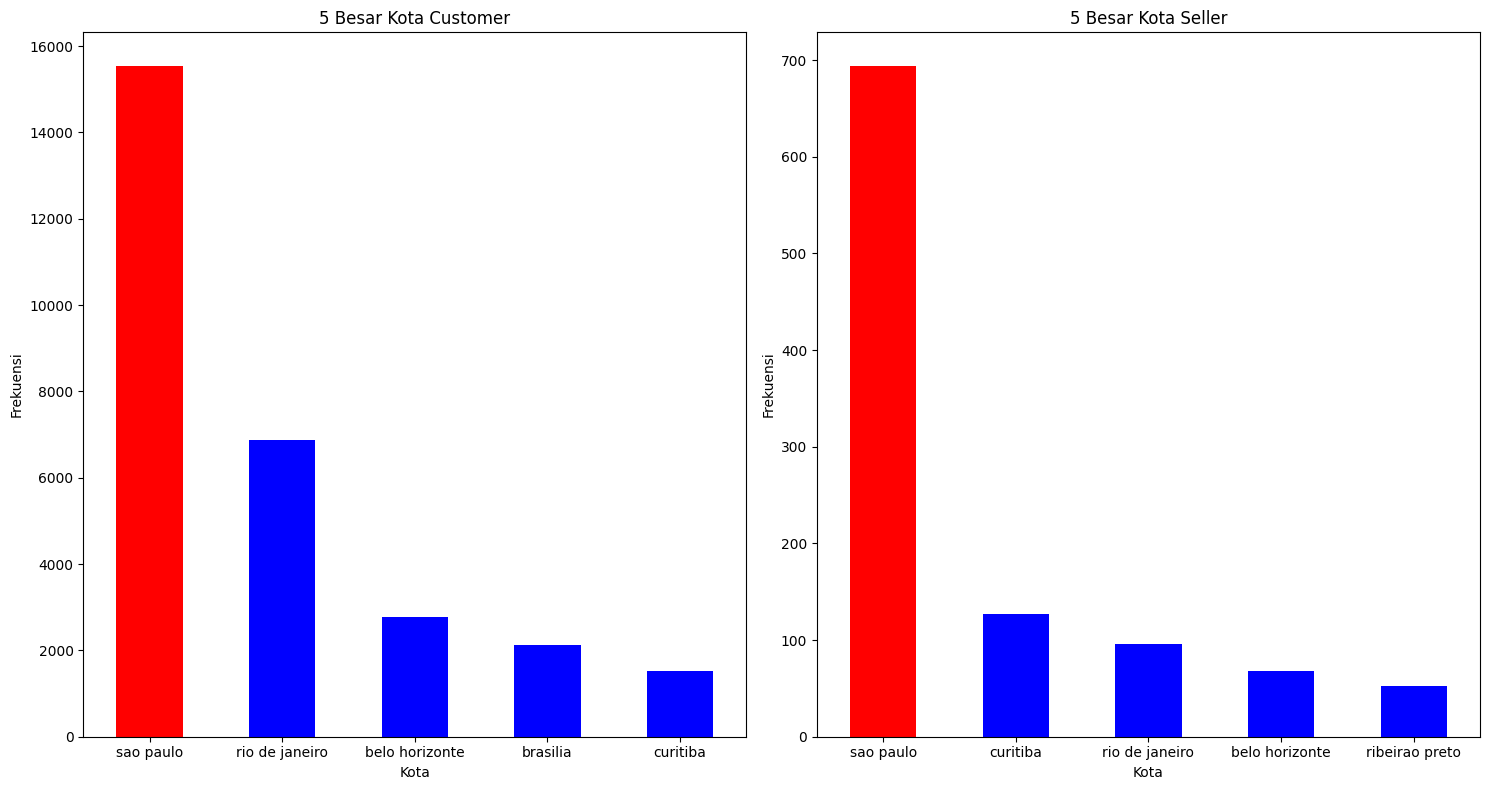

In [1280]:
top_city, (customer, seller) = plt.subplots(1, 2, figsize=(15, 8))

customer_colors = ['r' if city == customer_city_top_5.values[0] else 'b' for city in customer_city_top_5]
customer_city_top_5.plot(kind="bar", color=customer_colors, ax=customer)
customer.set_title('5 Besar Kota Customer')
customer.set_xlabel('Kota')
customer.set_ylabel('Frekuensi')
customer.set_xticklabels(customer.get_xticklabels(), rotation=0)

seller_colors = ['r' if city == seller_city_top_5.values[0] else 'b' for city in seller_city_top_5]
seller_city_top_5.plot(kind="bar", color=seller_colors, ax=seller)
seller.set_title('5 Besar Kota Seller')
seller.set_xlabel('Kota')
seller.set_ylabel('Frekuensi')
seller.set_xticklabels(seller.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

### Pertanyaan 2: Berapa banyak jumlah customer dan seller di kota tersebut?

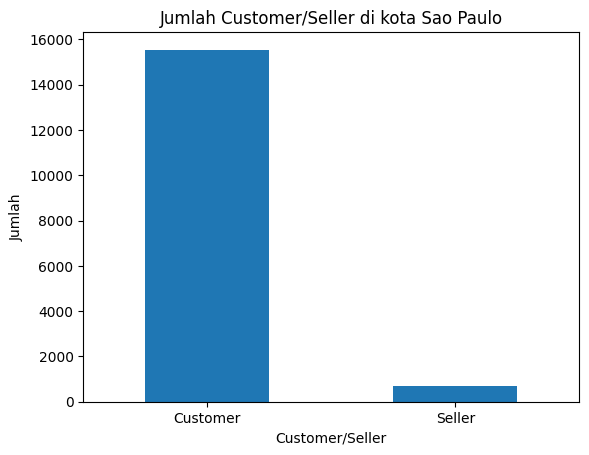

In [1281]:
total_number = pd.DataFrame({'Customer': customer_count, 'Seller': seller_count}.items(), columns=['Category', 'Value'])
total_number_plot = total_number.plot(kind='bar', x='Category', y='Value', legend=False)
total_number_plot.set_xlabel('Customer/Seller')
total_number_plot.set_ylabel('Jumlah')
total_number_plot.set_title('Jumlah Customer/Seller di kota Sao Paulo')
total_number_plot.set_xticklabels(total_number_plot.get_xticklabels(), rotation=0)
plt.show()

### Pertanyaan 3: Berapa volume transaksi customer dan seller di kota tersebut?

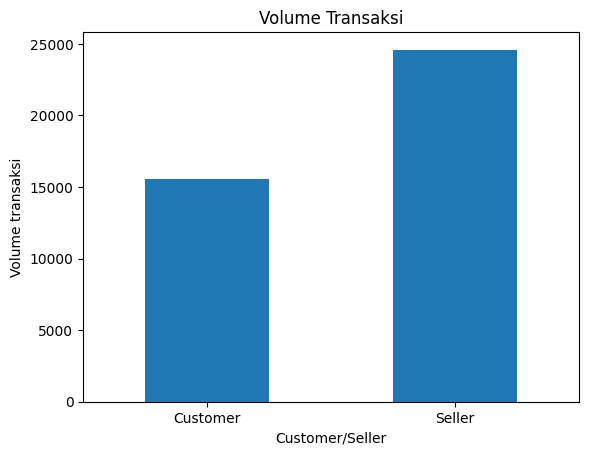

In [1282]:
#plot it to bar chart
transaction_volume = pd.DataFrame({'Customer': transaction_volume_of_customer, 'Seller': transaction_volume_of_seller}.items(), columns=['Category', 'Value'])
transaction_volume_plot = transaction_volume.plot(kind='bar', x='Category', y='Value', legend=False)
transaction_volume_plot.set_xlabel('Customer/Seller')
transaction_volume_plot.set_ylabel('Volume transaksi')
transaction_volume_plot.set_title('Volume Transaksi')
transaction_volume_plot.set_xticklabels(transaction_volume_plot.get_xticklabels(), rotation=0)
plt.show()

### Pertanyaan 4: Berapa nominal transaksi customer dan seller di kota tersebut?

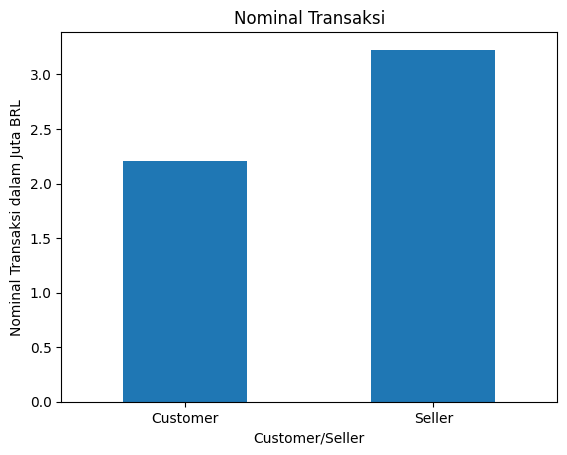

In [1283]:
# plot it to bar chart and normalize the value to Millions
transaction_value = pd.DataFrame({'Customer': transaction_value_of_customer, 'Seller': transaction_value_of_seller}.items(), columns=['Category', 'Value'])

transaction_value_plot = transaction_value.plot(kind='bar', x='Category', y='Value', legend=False)
transaction_value_plot.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}'))

transaction_value_plot.set_xlabel('Customer/Seller')
transaction_value_plot.set_ylabel('Nominal Transaksi dalam Juta BRL')
transaction_value_plot.set_title('Nominal Transaksi')
transaction_value_plot.set_xticklabels(transaction_value_plot.get_xticklabels(), rotation=0)
plt.show()

### Pertanyaan 5: Bagaimana distribusi demografis customer dan seller di kota tersebut dalam bentuk peta kontur?

In [1284]:

customer_location_map = folium.Map(location=[sao_paulo_centroid.lat.mean(), sao_paulo_centroid.long.mean()], zoom_start=12, control_scale=True)
cust_heatmap_data = []
for index, customer in customer_location_plot.iterrows():
    cust_heatmap_data.append([customer['lat'], customer['long'], customer['number_of_customer']])

HeatMap(cust_heatmap_data).add_to(customer_location_map)
customer_location_map

In [1285]:
seller_location_map = folium.Map(location=[sao_paulo_centroid.lat.mean(), sao_paulo_centroid.long.mean()], zoom_start=12, control_scale=True)

seller_heatmap_data = []
for index, seller in seller_location_plot.iterrows():
    seller_heatmap_data.append([seller['lat'], seller['long'], seller['seller_frequency']])

HeatMap(seller_heatmap_data).add_to(seller_location_map)
seller_location_map

### Pertanyaan 6: Bagaimana distribusi nominal transaksi di kota tersebut dalam bentuk peta kontur?

In [1286]:
customer_payment_map = folium.Map(location=[sao_paulo_centroid.lat.mean(), sao_paulo_centroid.long.mean()], zoom_start=12, control_scale=True)
cust_pay_data = []
for index, customer in customer_location_plot.iterrows():
    cust_pay_data.append([customer['lat'], customer['long'], customer['payment_value']])

HeatMap(cust_pay_data, ).add_to(customer_payment_map)
customer_payment_map

In [1287]:
seller_payment_map = folium.Map(location=[sao_paulo_centroid.lat.mean(), sao_paulo_centroid.long.mean()], zoom_start=12, control_scale=True)

seller_pay_data = []
for index, seller in seller_location_plot.iterrows():
    seller_pay_data.append([seller['lat'], seller['long'], seller['payment_value']])

HeatMap(seller_pay_data).add_to(seller_payment_map)
seller_payment_map

## Conclusion
- Kota mana yang paling banyak terdapat customer dan seller?
    > Terlihat bahwa kota yang memiliki customer dan seller terbanyak adalah kota Sao Paulo
- Berapa banyak jumlah customer dan seller di kota tersebut?
    > Jumlah customer lebih banyak daripada seller di kota Sao Paulo. Customer di kota Sao Paulo berjumlah 15540, sedangkan seller di kota Sao Paulo berjumlah 694.
- Berapa volume transaksi customer dan seller di kota tersebut?
    > Volume transaksi customer di kota Sao Paulo adalah 15540, sedangkan volume transaksi seller di kota Sao Paulo adalah 24588
- Berapa nominal transaksi customer dan seller di kota tersebut?
    > Nominal transaksi seluruh customer di kota Sao Paulo adalah 2203373.09 BRL, sedangkan nominal transaksi seller adalah 3226758.32 BRL
- Bagaimana distribusi demografis customer dan seller di kota tersebut dalam bentuk peta kontur?
    > Secara jumlah, customer customer lebih banyak dibandingkan seller di kota Sao Paulo. Persebaran customer relatif lebih merata di seluruh kota dibandingkan dengan seller yang lebih terpusat di tengah kota Sao Paulo
- Bagaimana distribusi nominal transaksi di kota tersebut dalam bentuk peta kontur?
    > Pola persebaran nominal transaksi secara umum mengikuti pola persebaran jumlah customer/seller. Hal ini sesuai dengan hubungan antara nominal transaksi yang berbanding lurus dengan jumlah customer/seller. Semakin banyak customer/seller akan semakin banyak juga nominal transaksinya.
